In [3]:
import cv2
import numpy as np
import os
from random import shuffle
from tqdm import tqdm
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [4]:
TRAIN_DIR = '/home/jared/Documents/ECE4800/crack_detection/concrete_crack_detection_dataset/dataset'
TEST_DIR  = '/home/jared/Documents/ECE4800/crack_detection/concrete_crack_detection_dataset/dataset'
IMG_SIZE = 50
LR = 1e-3
RGB = 3
MODEL_NAME = 'crack_detection-{}-{}.model'.format(LR, '2conv-basic') # just so we remember which saved model is which, sizes must match

In [5]:
def label_img(img):
    word_label = img.split('_')[0]
    ''' Looking for the dataset & will return the adequate label '''
    if word_label == 'positive': return [1,0]
    if word_label == 'negative': return [0,1]

In [6]:
def create_train_data():
    training_data = []
    for img in tqdm(os.listdir(TRAIN_DIR)):
        label = label_img(img)
        path = os.path.join(TRAIN_DIR,img)
        img = cv2.resize(cv2.imread(path, cv2.IMREAD_GRAYSCALE),(IMG_SIZE,IMG_SIZE))
        training_data.append([np.array(img), np.array(label)])

    shuffle(training_data)
    np.save('training_data.py', training_data)
    return training_data

In [7]:
def process_test_data():
    testing_data = []
    for img in tqdm(os.lisdir(TEST_DIR)):
        path = os.path.join(TEST_DIR, img)
        img_num = img.split('.')[0]
        img = cv2.resize(cv2.imread(path, cv2.IMREAD_GRAYSCALE), (IMG_SIZE,IMG_SIZE))
        testing_data.append([np.arry(img), img_num])
    np.save('test_data.py', testing_data)
    return testing_data

In [9]:
if os.path.exists('training_data.npy'):
    train_data = np.load('training_data.npy', allow_pickle=True)
else:
    train_data = create_train_data()

In [10]:
train = train_data[:-500]
test = train_data[:-500:]

In [11]:
train_x = np.array([i[0]for i in train], dtype=np.float64).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
train_y = np.array([i[1] for i in train], dtype = np.float64)

In [12]:
test_x = np.array([i[0]for i in test], dtype=np.float64).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
test_y = np.array([i[1] for i in test], dtype = np.float64)

# print(train_x[0])

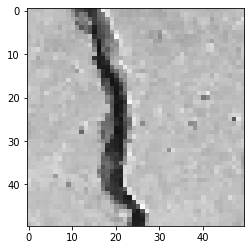

In [13]:
plt.imshow(train_x[1], cmap='gray', vmin=0, vmax=255)

In [14]:
cnn = models.Sequential([
    # CNN
    layers.Conv2D(filters = 32, kernel_size=(3,3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters = 64, kernel_size=(3,3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters = 32, kernel_size=(3,3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters = 64, kernel_size=(3,3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1)),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation = 'relu'),
    layers.Dense(2, activation = 'softmax')
])

print(cnn.output_shape)

cnn.compile(optimizer = 'adam',
            loss = 'categorical_crossentropy',
            metrics=['accuracy'])

(None, 2)


2022-06-04 16:23:01.567967: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/skrill/.local/lib/python3.10/site-packages/cv2/../../lib64:
2022-06-04 16:23:01.567995: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-06-04 16:23:01.568016: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (skrill-940X5N): /proc/driver/nvidia/version does not exist
2022-06-04 16:23:01.568503: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [15]:
cnn.fit(train_x, train_y, epochs = 3)

Epoch 1/3


2022-06-04 16:23:05.165919: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 395000000 exceeds 10% of free system memory.


   5/1235 [..............................] - ETA: 49s - loss: 1.7316 - accuracy: 0.5312 

2022-06-04 16:23:06.242256: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 21835008 exceeds 10% of free system memory.
2022-06-04 16:23:06.242297: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 21835008 exceeds 10% of free system memory.
2022-06-04 16:23:06.248788: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 23417856 exceeds 10% of free system memory.
2022-06-04 16:23:06.248841: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 23417856 exceeds 10% of free system memory.


 656/1235 [==============>...............] - ETA: 22s - loss: 0.0853 - accuracy: 0.9721

KeyboardInterrupt: 

In [ ]:
cnn.evaluate(test_x, test_y)

1235/1235 [==============================] - 17s 14ms/step - loss: 0.0176 - accuracy: 0.9947


[0.017611747607588768, 0.9947088360786438]